Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 n

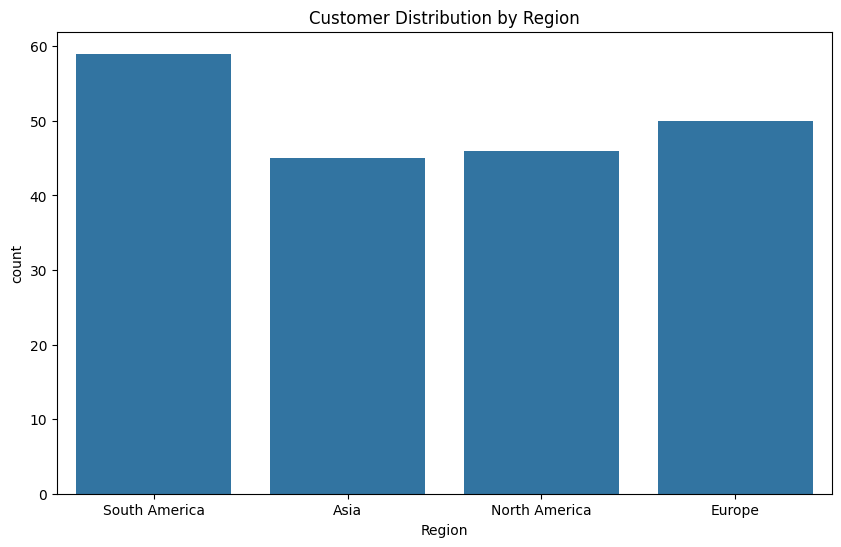

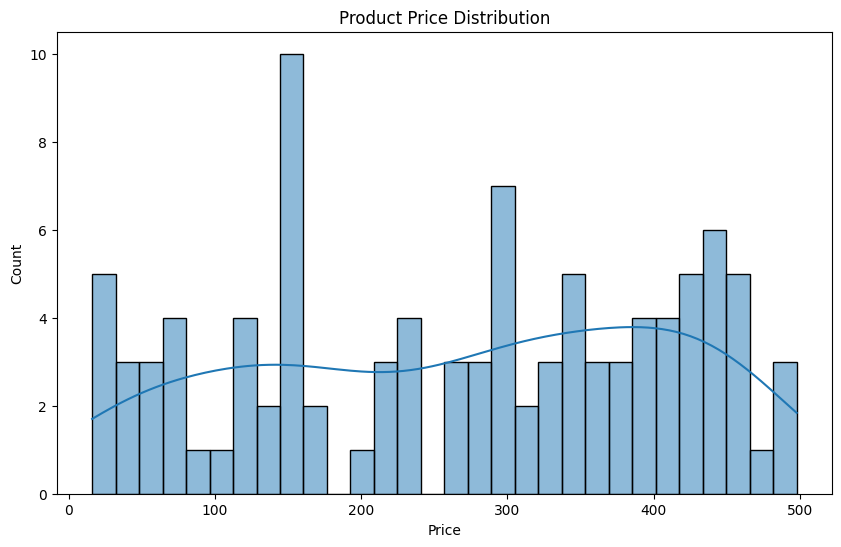

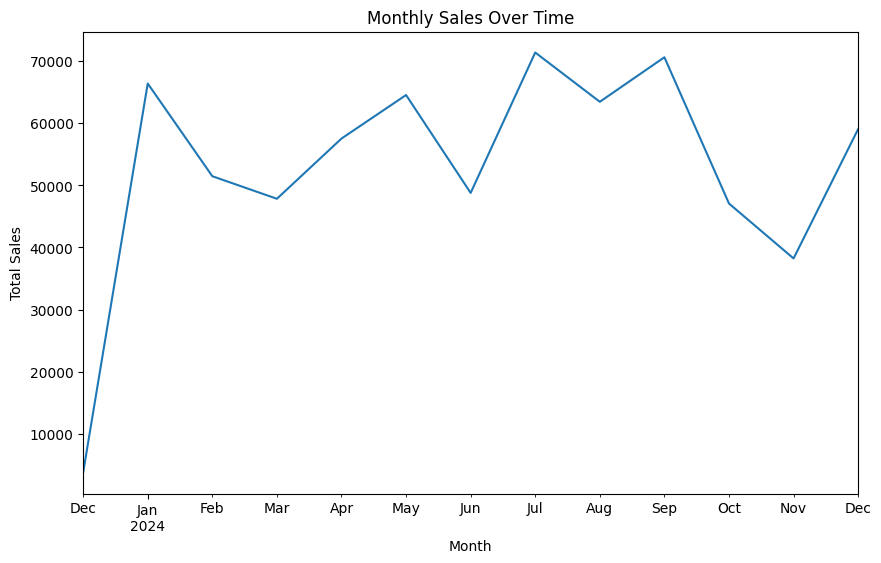


Top 5 Customers by Total Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64

Top 5 Products by Sales:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
Name: TotalValue, dtype: float64


In [28]:
#Task 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading datasets
customers = pd.read_csv('/content/drive/MyDrive/Space/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Space/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Space/Transactions.csv')

#EDA
print("Customers Data:")
print(customers.info())
print(customers.describe())

print("\nProducts Data:")
print(products.info())
print(products.describe())

print("\nTransactions Data:")
print(transactions.info())
print(transactions.describe())

#Checking for missing values
print("\nMissing Values in Customers:", customers.isnull().sum())
print("Missing Values in Products:", products.isnull().sum())
print("Missing Values in Transactions:", transactions.isnull().sum())

#Visualizations
#Customer Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title("Customer Distribution by Region")
plt.show()

#Product Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=30, kde=True)
plt.title("Product Price Distribution")
plt.show()

#Total Sales Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

#Merge data for deeper insights
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

#Top 5 Customers by Total Spending
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().nlargest(5)
print("\nTop 5 Customers by Total Spending:")
print(top_customers)

#Top 5 Products by Sales
top_products = merged_data.groupby('ProductID')['TotalValue'].sum().nlargest(5)
print("\nTop 5 Products by Sales:")
print(top_products)